In [26]:
#   !pip install numpy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv




In [12]:
# ['testCompleteC45W1P50-0-20240109-11:11:16-14684', 'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '........' , '0 1 .......'

# FILE : testExpP50_25_all.csv
# ROW : [ 'testExpP50-1-20240110-18:12:49-3640',  'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '...tempi...' , '0 1 .......' ]


#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
if use_exp == True :
    target_tso = ["25","30","35", "40", "45", "50"]
elif use_exp == False:
    target_tso = ["25","30","35", "40", "45", "50", "55", "60", "65"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = True

target_tn = 30

# PROBABILITY
probability = 50

In [14]:
# [ 'testCompleteC45W1P50-0-20240110-10:18:14-16368' ,' scalar' ,' J_Network.queuer' ,'jobsQueueLen:timeavg' ,  ,  , '0.83719745172292' ,,,,,,,, ]
r1 = "scalar"
r2 = "J_Network.queuer"
r3 = "jobsQueueLen:timeavg"
#   import csv

jqTime_all_tsos = []
for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    file_name_csv = f'test{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'
    jQtime_all_this_tso = []

    with open(f'../simulations/results/{file_name_csv}') as csv_file : 
        # we take the time average of this iteration
        jQTime_avg = 0
        reader = csv.reader(csv_file)
        for row in reader:
            #   r1 = "vector"
            #   r3 = "jobsQueueLen:vector"
            if row[1]==r1 and row[2] == r2 and row[3]==r3:
                rigaTarget = list(row)
                #   print(rigaTarget)
                #   print(rigaTarget[6])
                jQTime_avg = rigaTarget[6]

                jQtime_all_this_tso.append(float(jQTime_avg))
                if use_all == False:
                    break
        #   print(jQueueLen_vector)
    jqTime_all_tsos.append(jQtime_all_this_tso)

# now we have all tsos of all !
print(jqTime_all_tsos)

[[0.49511529071337, 0.54006489732506, 0.42999873365961, 0.55749279058005, 0.50003543121838, 0.43092460717355, 0.55596530312986, 0.55933427316425, 0.5850763154832, 0.38330817726843, 0.40026235106893, 0.45733266160953, 0.56748265251011, 0.41088316362731, 0.53865486985941, 0.43773473185735, 0.4076316645218, 0.46768665227792, 0.49149773619909, 0.42026227511945, 0.46852325512651, 0.5937366268067, 0.51452534777527, 0.37317875287745, 0.46351645112233, 0.56633601404157, 0.69946166015348, 0.60539398385259, 0.54326535700056, 0.57528696574921], [1.0649703483909, 0.82080692187569, 0.80473682368485, 1.105405695949, 1.0936331856534, 0.91769811811861, 1.0336210038386, 1.2004527055935, 1.092427433384, 0.74558783098688, 0.96132594343463, 0.78354883206523, 1.2238076487975, 0.77887672269087, 1.2709326892247, 0.90623324471753, 0.92609053935035, 0.80086682162957, 1.1773780922358, 0.96351629476425, 0.84657047956314, 1.0109365287349, 0.95375928421035, 0.86028584348419, 0.87592896719728, 1.5323317850873, 1.83

In [4]:
#   import pickle

In [31]:
#   with open('./saving', 'wb') as file_pi:
#       pickle.dump(jqTime_all_tsos, file_pi)


In [32]:
#   with open('./saving', "rb") as file_pi:
#       jqTime_all_tsos = pickle.load(file_pi)
    

In [15]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    return mean, confidence_interval

[0.49511529071337, 0.54006489732506, 0.42999873365961, 0.55749279058005, 0.50003543121838, 0.43092460717355, 0.55596530312986, 0.55933427316425, 0.5850763154832, 0.38330817726843, 0.40026235106893, 0.45733266160953, 0.56748265251011, 0.41088316362731, 0.53865486985941, 0.43773473185735, 0.4076316645218, 0.46768665227792, 0.49149773619909, 0.42026227511945, 0.46852325512651, 0.5937366268067, 0.51452534777527, 0.37317875287745, 0.46351645112233, 0.56633601404157, 0.69946166015348, 0.60539398385259, 0.54326535700056, 0.57528696574921]
this_mean :  0.5013322997624109
0.02755937960295829
[1.0649703483909, 0.82080692187569, 0.80473682368485, 1.105405695949, 1.0936331856534, 0.91769811811861, 1.0336210038386, 1.2004527055935, 1.092427433384, 0.74558783098688, 0.96132594343463, 0.78354883206523, 1.2238076487975, 0.77887672269087, 1.2709326892247, 0.90623324471753, 0.92609053935035, 0.80086682162957, 1.1773780922358, 0.96351629476425, 0.84657047956314, 1.0109365287349, 0.95375928421035, 0.86028

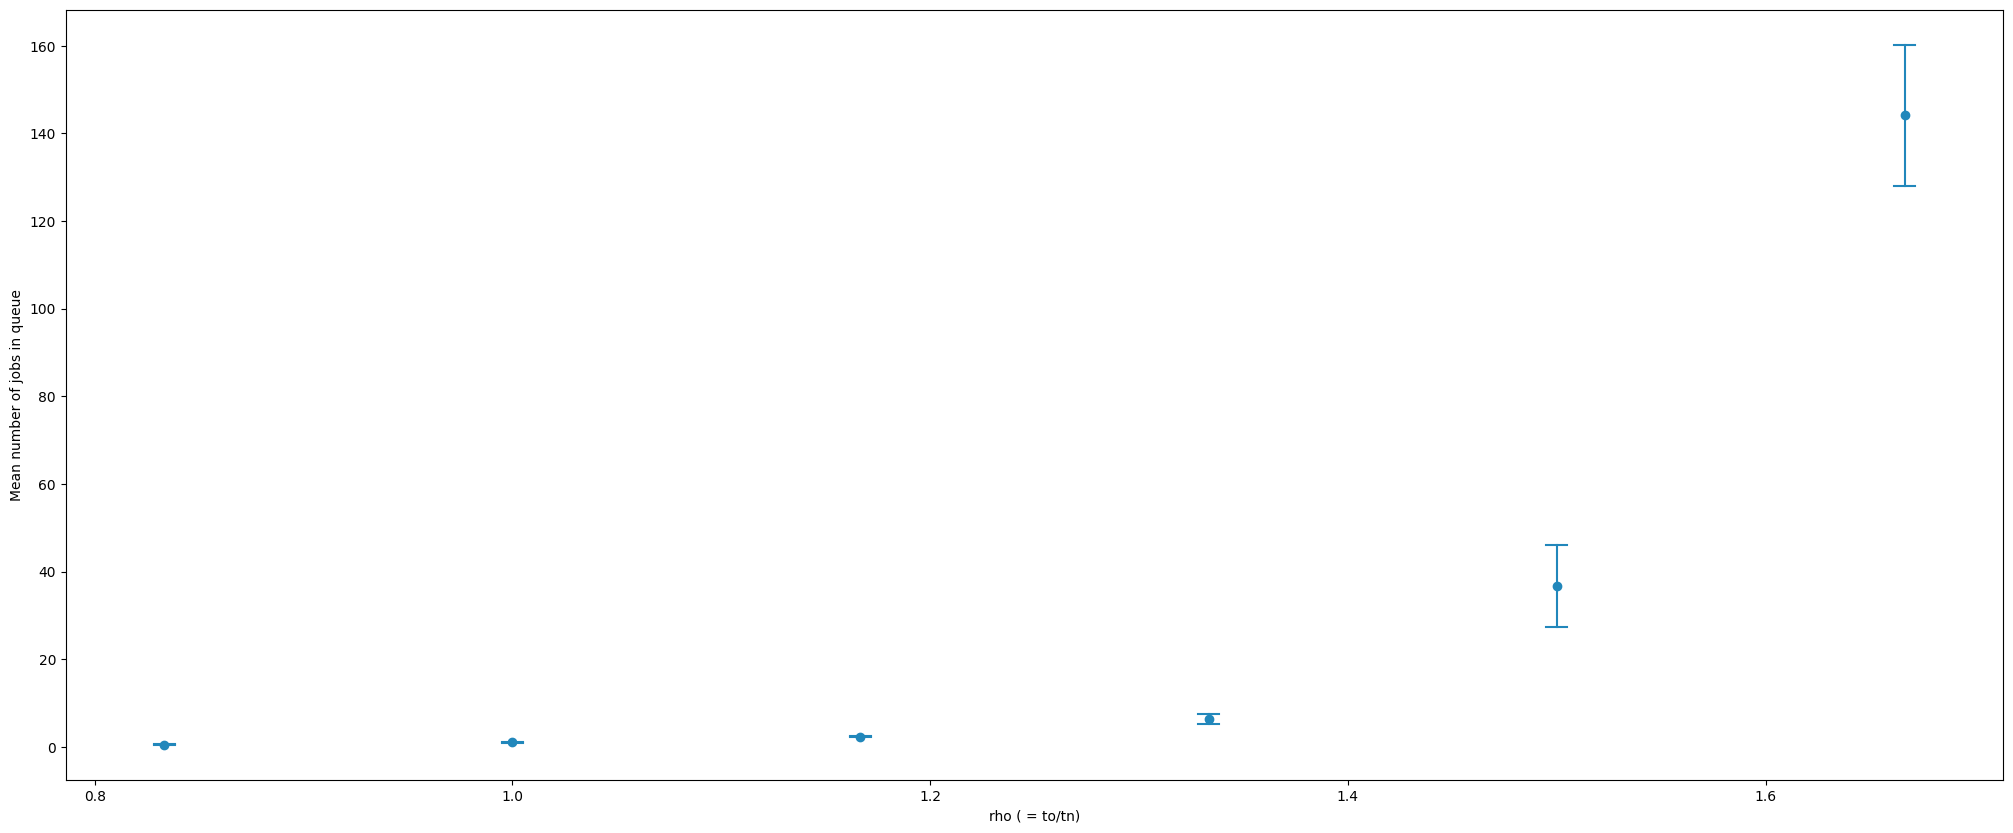

In [17]:

#   #   for i in jQueueLen_vector:
#   #       nums.append( int(i[0]))
#   #   print(nums)

plt.rcParams["figure.figsize"] = (25, 10)
for tso_this_iter in range(0, len(target_tso), 1) :
	this_tso_averages = jqTime_all_tsos[tso_this_iter]
	print(this_tso_averages)
	#	print("tipo di this_tso_averages : ", type(this_tso_averages))
	#	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
	#	print("tipo di target_tn : ", type(target_tn))
	#	#	tipo di this_tso_averages :  <class 'list'>
	#	#	tipo di this_tso_averages[0] :  <class 'float'>
	#	#	tipo di target_tn :  <class 'float'>
	this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
	print("this_mean : ", this_mean)
	print(this_conf_int)

#	rho = np.linspace(0.05, 2, 100)
#	rho = rho 
#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
#	plt.legend(loc="upper left")


plt.ylabel("Mean number of jobs in queue")
plt.xlabel("rho ( = to/tn)")
plt.show()



